In [1]:
%load_ext rpy2.ipython
from IPython.display import FileLink

In [2]:
%%R
library(data.table)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(plyr); library(dplyr) 

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
Need help? Try the ggplot2 mailing list: http://groups.google.com/group/ggplot2.
Loading required package: grid

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:data.table’:

    between, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
%%R
mdf = tbl_df(fread("../data/mdf.csv"))
mdf

Read 2195072 rows and 18 (of 18) columns from 0.435 GB file in 00:00:05
Source: local data frame [2,195,072 x 18]

     OTU       Sample Abundance   X.SampleID BarcodeSequence Day Density
1  OTU.1  cont.PS.3.6      8814  cont.PS.3.6      TCAGAGACTG   3  1.7515
2  OTU.1  cont.PS.3.7      8604  cont.PS.3.7      TCAGAGAGAG   3  1.7450
3  OTU.6 13C.PS.14.10      2910 13C.PS.14.10      TCAAGGATGC  14  1.7297
4  OTU.1  13X.PS.7.11      2183  13X.PS.7.11      TCACTGGAGA   7  1.7209
5  OTU.1  13X.PS.7.12      2081  13X.PS.7.12      TCACTGGTCA   7  1.7177
6  OTU.1 cont.PS.30.8      1825 cont.PS.30.8      TCAACGATCC  30  1.7461
7  OTU.1  13C.PS.7.18      1785  13C.PS.7.18      TCACACTGAC   7  1.7122
8  OTU.2  cont.PS.3.6      1722  cont.PS.3.6      TCAGAGACTG   3  1.7515
9  OTU.1  13X.PS.1.12      1606  13X.PS.1.12      TCACTCACAG   1  1.7231
10 OTU.1 cont.PS.30.7      1550 cont.PS.30.7      TCAACCATCG  30  1.7526
..   ...          ...       ...          ...             ... ...     ...
Variables

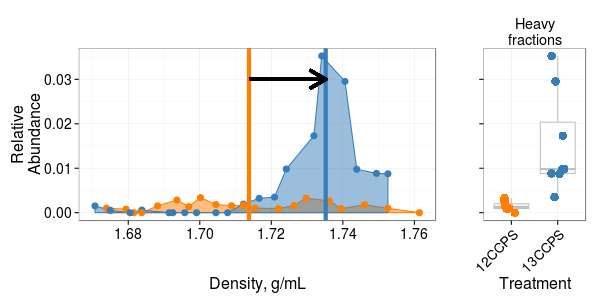

In [4]:
%%R -w 600 -h 300
colours = c("#ff7f00", "#377eb8") #, "#4daf4a")

otu = "OTU.4322"
day = 30
treatment = "13CCPS"
control = "12CCPS"
d = mdf %>%
    group_by(Sample) %>%
    mutate(Abundance.rel = Abundance / sum(Abundance)) %>%
    filter(OTU == otu, Day == day, Treatment %in% c(treatment, control), !is.na(Density))

d.com = d %>% group_by(Treatment) %>% 
    summarize(Density = weighted.mean(x = Density, w = Abundance.rel, na.rm = TRUE))

p1 = ggplot(d, aes(x = Density, y = Abundance.rel, color = Treatment, fill = Treatment))

p1 = p1 + geom_area(position = "dodge", alpha = 0.5)

p1 = p1 + geom_point(size = 3, pch = 21)

p1 = p1 + geom_vline(data = d.com, size = 2, aes(xintercept = Density, color = Treatment))
p1 = p1 + geom_segment(color = "black", 
                       size = 1.5, 
                       aes(y = 0.03, yend = 0.03, 
                           x = d.com[d.com$Treatment == control,]$Density,
                           xend = d.com[d.com$Treatment == treatment,]$Density),
                       arrow = arrow(length = unit(0.65, "cm")))

#p1 = p1 + geom_vline(aes(xintercept = 1.72))

p1 = p1 + scale_color_manual(values = colours, guide = "none")
p1 = p1 + scale_fill_manual(values = colours, guide = "none")

p1 = p1 + labs(y = "Relative\nAbundance", x = "Density, g/mL")

p1 = p1 + theme_bw()
p1 = p1 + theme(axis.text = element_text(size = 14),
                axis.title = element_text(size = 16))

gp1 = ggplot_gtable(ggplot_build(p1))

p2 = ggplot(d %>% filter(Density >= 1.72), 
            aes(x = Treatment, y = Abundance.rel, color = Treatment))

p2 = p2 + geom_boxplot(color = "gray")
p2 = p2 + geom_point(size = 4, position = position_jitter(w = 0.15))

p2 = p2 + scale_color_manual(values = colours, guide = "none")

p2 = p2 + labs(y = "")

p2 = p2 + theme_bw()
p2 = p2 + theme(axis.text.y = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 14), 
                axis.title = element_text(size = 16))
p2 = p2 + ggtitle("Heavy\nfractions")

gp2 = ggplot_gtable(ggplot_build(p2))

maxHeight = grid::unit.pmax(gp1$heights[c(2,4)],gp2$heights[c(2,4)])
gp1$heights[c(2,4)] <- as.list(maxHeight)
gp2$heights[c(2,4)] <- as.list(maxHeight)

grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))

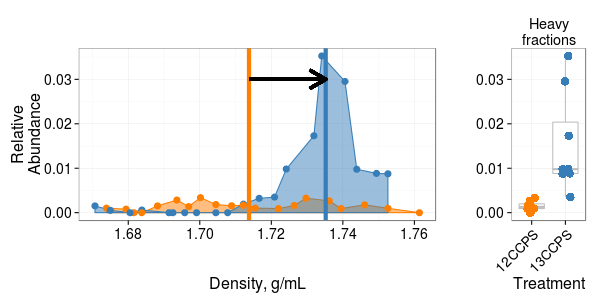

In [5]:
%%R -w 600 -h 300
colours = c("#ff7f00", "#377eb8") #, "#4daf4a")

otu = "OTU.4322"
day = 30
treatment = "13CCPS"
control = "12CCPS"
d = mdf %>%
    group_by(Sample) %>%
    mutate(Abundance.rel = Abundance / sum(Abundance)) %>%
    filter(OTU == otu, Day == day, Treatment %in% c(treatment, control), !is.na(Density))

d.com = d %>% group_by(Treatment) %>% 
    summarize(Density = weighted.mean(x = Density, w = Abundance.rel, na.rm = TRUE))

p1 = ggplot(d, aes(x = Density, y = Abundance.rel, color = Treatment, fill = Treatment))

p1 = p1 + geom_area(position = "dodge", alpha = 0.5)

p1 = p1 + geom_point(size = 3, pch = 21)

p1 = p1 + geom_vline(data = d.com, size = 2, aes(xintercept = Density, color = Treatment))
p1 = p1 + geom_segment(color = "black", 
                       size = 1.5, 
                       aes(y = 0.03, yend = 0.03, 
                           x = d.com[d.com$Treatment == control,]$Density,
                           xend = d.com[d.com$Treatment == treatment,]$Density),
                       arrow = arrow(length = unit(0.65, "cm")))

#p1 = p1 + geom_vline(aes(xintercept = 1.72))

p1 = p1 + scale_color_manual(values = colours, guide = "none")
p1 = p1 + scale_fill_manual(values = colours, guide = "none")

p1 = p1 + labs(y = "Relative\nAbundance", x = "Density, g/mL")

p1 = p1 + theme_bw()
p1 = p1 + theme(axis.text = element_text(size = 14),
                axis.title = element_text(size = 16))

gp1 = ggplot_gtable(ggplot_build(p1))

p2 = ggplot(d %>% filter(Density >= 1.72), 
            aes(x = Treatment, y = Abundance.rel, color = Treatment))

p2 = p2 + geom_boxplot(color = "gray")
p2 = p2 + geom_point(size = 4, position = position_jitter(w = 0.15))

p2 = p2 + scale_color_manual(values = colours, guide = "none")

p2 = p2 + labs(y = "")

p2 = p2 + theme_bw()
p2 = p2 + theme(axis.text.y = element_text(size = 14), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 14), 
                axis.title = element_text(size = 16))
p2 = p2 + ggtitle("Heavy\nfractions")

gp2 = ggplot_gtable(ggplot_build(p2))

maxHeight = grid::unit.pmax(gp1$heights[c(2,4)],gp2$heights[c(2,4)])
gp1$heights[c(2,4)] <- as.list(maxHeight)
gp2$heights[c(2,4)] <- as.list(maxHeight)

grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))

In [6]:
%%R
pdf("figs/conceptual1.pdf", width = 8, height = 4)
grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))
dev.off()

png 
  2 


In [7]:
FileLink("figs/conceptual1.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/conceptual1.pdf

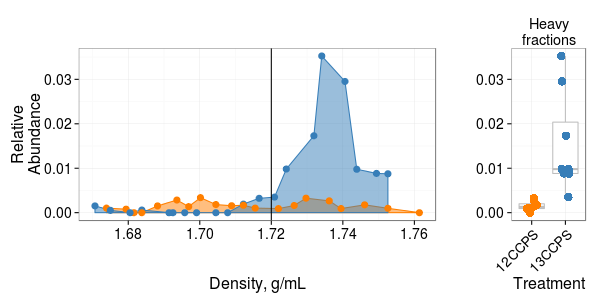

In [8]:
%%R -w 600 -h 300
colours = c("#ff7f00", "#377eb8") #, "#4daf4a")

otu = "OTU.4322"
day = 30
treatment = "13CCPS"
control = "12CCPS"
d = mdf %>%
    group_by(Sample) %>%
    mutate(Abundance.rel = Abundance / sum(Abundance)) %>%
    filter(OTU == otu, Day == day, Treatment %in% c(treatment, control), !is.na(Density))

d.com = d %>% group_by(Treatment) %>% 
    summarize(Density = weighted.mean(x = Density, w = Abundance.rel, na.rm = TRUE))

p1 = ggplot(d, aes(x = Density, y = Abundance.rel, color = Treatment, fill = Treatment))

p1 = p1 + geom_area(position = "dodge", alpha = 0.5)

p1 = p1 + geom_point(size = 3, pch = 21)

#p1 = p1 + geom_vline(data = d.com, size = 2, aes(xintercept = Density, color = Treatment))
#p1 = p1 + geom_segment(color = "black", 
#                       size = 1.5, 
#                       aes(y = 0.03, yend = 0.03, 
#                           x = d.com[d.com$Treatment == control,]$Density,
#                           xend = d.com[d.com$Treatment == treatment,]$Density),
#                       arrow = arrow(length = unit(0.65, "cm")))

p1 = p1 + geom_vline(aes(xintercept = 1.72))

p1 = p1 + scale_color_manual(values = colours, guide = "none")
p1 = p1 + scale_fill_manual(values = colours, guide = "none")

p1 = p1 + labs(y = "Relative\nAbundance", x = "Density, g/mL")

p1 = p1 + theme_bw()
p1 = p1 + theme(axis.text = element_text(size = 14),
                axis.title = element_text(size = 16))

gp1 = ggplot_gtable(ggplot_build(p1))

p2 = ggplot(d %>% filter(Density >= 1.72), 
            aes(x = Treatment, y = Abundance.rel, color = Treatment))

p2 = p2 + geom_boxplot(color = "gray")
p2 = p2 + geom_point(size = 4, position = position_jitter(w = 0.15))

p2 = p2 + scale_color_manual(values = colours, guide = "none")

p2 = p2 + labs(y = "")

p2 = p2 + theme_bw()
p2 = p2 + theme(axis.text.y = element_text(size = 14), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 14), 
                axis.title = element_text(size = 16))
p2 = p2 + ggtitle("Heavy\nfractions")

gp2 = ggplot_gtable(ggplot_build(p2))

maxHeight = grid::unit.pmax(gp1$heights[c(2,4)],gp2$heights[c(2,4)])
gp1$heights[c(2,4)] <- as.list(maxHeight)
gp2$heights[c(2,4)] <- as.list(maxHeight)

grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))

In [9]:
%%R
pdf("figs/conceptual2.pdf", width = 8, height = 4)
grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))
dev.off()

png 
  2 


In [10]:
FileLink("figs/conceptual2.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/conceptual2.pdf

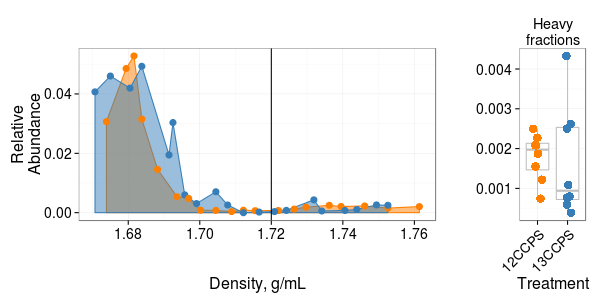

In [11]:
%%R -w 600 -h 300
colours = c("#ff7f00", "#377eb8") #, "#4daf4a")

otu = "OTU.7"
day = 30
treatment = "13CCPS"
control = "12CCPS"
d = mdf %>%
    group_by(Sample) %>%
    mutate(Abundance.rel = Abundance / sum(Abundance)) %>%
    filter(OTU == otu, Day == day, Treatment %in% c(treatment, control), !is.na(Density))

d.com = d %>% group_by(Treatment) %>% 
    summarize(Density = weighted.mean(x = Density, w = Abundance.rel, na.rm = TRUE))

p1 = ggplot(d, aes(x = Density, y = Abundance.rel, color = Treatment, fill = Treatment))

p1 = p1 + geom_area(position = "dodge", alpha = 0.5)

p1 = p1 + geom_point(size = 3, pch = 21)

#p1 = p1 + geom_vline(data = d.com, size = 2, aes(xintercept = Density, color = Treatment))
#p1 = p1 + geom_segment(color = "black", 
#                       size = 1.5, 
#                       aes(y = 0.03, yend = 0.03, 
#                           x = d.com[d.com$Treatment == control,]$Density,
#                           xend = d.com[d.com$Treatment == treatment,]$Density),
#                       arrow = arrow(length = unit(0.65, "cm")))

p1 = p1 + geom_vline(aes(xintercept = 1.72))

p1 = p1 + scale_color_manual(values = colours, guide = "none")
p1 = p1 + scale_fill_manual(values = colours, guide = "none")

p1 = p1 + labs(y = "Relative\nAbundance", x = "Density, g/mL")

p1 = p1 + theme_bw()
p1 = p1 + theme(axis.text = element_text(size = 14),
                axis.title = element_text(size = 16))

gp1 = ggplot_gtable(ggplot_build(p1))

p2 = ggplot(d %>% filter(Density >= 1.72), 
            aes(x = Treatment, y = Abundance.rel, color = Treatment))

p2 = p2 + geom_boxplot(color = "gray")
p2 = p2 + geom_point(size = 4, position = position_jitter(w = 0.15))

p2 = p2 + scale_color_manual(values = colours, guide = "none")

p2 = p2 + labs(y = "")

p2 = p2 + theme_bw()
p2 = p2 + theme(axis.text.y = element_text(size = 14), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 14), 
                axis.title = element_text(size = 16))
p2 = p2 + ggtitle("Heavy\nfractions")

gp2 = ggplot_gtable(ggplot_build(p2))

maxHeight = grid::unit.pmax(gp1$heights[c(2,4)],gp2$heights[c(2,4)])
gp1$heights[c(2,4)] <- as.list(maxHeight)
gp2$heights[c(2,4)] <- as.list(maxHeight)

grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))

In [12]:
%%R
pdf("figs/conceptual3.pdf", width = 8, height = 4)
grid.arrange(arrangeGrob(arrangeGrob(gp1,gp2,widths=c(6/8,2/8),ncol=2)))
dev.off()

png 
  2 


In [13]:
FileLink("figs/conceptual3.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/conceptual3.pdf